<h1 style='color:blue'>Assignments related to Pandas using Countries Dataset</h1>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
cdf = pd.read_json("https://restcountries.eu/rest/v2/all")

#### Display country names in regions - Asia, Africa and Europe

In [4]:
cdf.loc[cdf['region'].isin(['Asia','Africa','Europe']),['name','region']]

,name,region
0,Afghanistan,Asia
1,Åland Islands,Europe
2,Albania,Europe
3,Algeria,Africa
5,Andorra,Europe
...,...,...
244,Viet Nam,Asia
246,Western Sahara,Africa
247,Yemen,Asia
248,Zambia,Africa


#### Display top 5 countries based on population

In [5]:
cdf.nlargest(5,'population')[['name','population']]

,name,population
48,China,1377422166
104,India,1295210000
239,United States of America,323947000
105,Indonesia,258705000
31,Brazil,206135893


#### Display country name, population, region for countries where area of the country is more than 50,00,000 sq. kms.

In [6]:
cdf.loc[cdf['area'] > 5000000,['name','population','region']]

,name,population,region
8,Antarctica,1000,Polar
13,Australia,24117360,Oceania
31,Brazil,206135893,Americas
42,Canada,36155487,Americas
48,China,1377422166,Asia
185,Russian Federation,146599183,Europe
239,United States of America,323947000,Americas


#### Display 5 largest countries and 5 smallest countries in terms of area. Ignore countries without area.

In [7]:
cdf[cdf['area'].notna()].nlargest(5,'area')[['name','area']]

,name,area
185,Russian Federation,17124442.0
8,Antarctica,14000000.0
42,Canada,9984670.0
48,China,9640011.0
239,United States of America,9629091.0


In [9]:
cdf[cdf['area'].notna()].nsmallest(5,'area')[['name','area']]

,name,area
99,Holy See,0.44
147,Monaco,2.02
86,Gibraltar,6.00
227,Tokelau,12.00
50,Cocos (Keeling) Islands,14.00


#### Display highest area and the population of that country

In [10]:
cdf.nlargest(1,'area')[['name','area','population']]

,name,area,population
185,Russian Federation,17124442.0,146599183


#### Display countries where the name starts with 'I'

In [11]:
cdf[cdf['name'].str.startswith('I')]['name']

103                       Iceland
104                         India
105                     Indonesia
107    Iran (Islamic Republic of)
108                          Iraq
109                       Ireland
110                   Isle of Man
111                        Israel
112                         Italy
Name: name, dtype: object

#### Display country name and names of countries with which the country shares borders (codes).

In [14]:
cdf.apply(lambda s: f"{s['name']:20} {','.join(s['borders']):30}", axis=1)

0      Afghanistan          IRN,PAK,TKM,UZB,TJK,CHN  ...
1      Åland Islands                                 ...
2      Albania              MNE,GRC,MKD,KOS          ...
3      Algeria              TUN,LBY,NER,ESH,MRT,MLI,M...
4      American Samoa                                ...
                             ...                        
245    Wallis and Futuna                             ...
246    Western Sahara       DZA,MRT,MAR              ...
247    Yemen                OMN,SAU                  ...
248    Zambia               AGO,BWA,COD,MWI,MOZ,NAM,T...
249    Zimbabwe             BWA,MOZ,ZAF,ZMB          ...
Length: 250, dtype: object

In [13]:
## Another way to print name and borders
for i in range(0,len(cdf)):
    print(f"{cdf.iloc[i]['name']:30s} - {','.join(cdf.iloc[i]['borders'])}")

Afghanistan                    - IRN,PAK,TKM,UZB,TJK,CHN
Åland Islands                  - 
Albania                        - MNE,GRC,MKD,KOS
Algeria                        - TUN,LBY,NER,ESH,MRT,MLI,MAR
American Samoa                 - 
Andorra                        - FRA,ESP
Angola                         - COG,COD,ZMB,NAM
Anguilla                       - 
Antarctica                     - 
Antigua and Barbuda            - 
Argentina                      - BOL,BRA,CHL,PRY,URY
Armenia                        - AZE,GEO,IRN,TUR
Aruba                          - 
Australia                      - 
Austria                        - CZE,DEU,HUN,ITA,LIE,SVK,SVN,CHE
Azerbaijan                     - ARM,GEO,IRN,RUS,TUR
Bahamas                        - 
Bahrain                        - 
Bangladesh                     - MMR,IND
Barbados                       - 
Belarus                        - LVA,LTU,POL,RUS,UKR
Belgium                        - FRA,DEU,LUX,NLD
Belize                         - GTM,MEX

#### Select countries where language English is spoken

In [15]:
# ls is a list of dict
def english_spoken(ls):
    # print(type(ls))
    for d in ls:
        if 'en' in d.values():
            return True
    else:
        return False
    
cdf.loc[cdf['languages'].apply(english_spoken),['name','languages']]

,name,languages
4,American Samoa,"[{'iso639_1': 'en', 'iso639_2': 'eng', 'name':..."
7,Anguilla,"[{'iso639_1': 'en', 'iso639_2': 'eng', 'name':..."
8,Antarctica,"[{'iso639_1': 'en', 'iso639_2': 'eng', 'name':..."
9,Antigua and Barbuda,"[{'iso639_1': 'en', 'iso639_2': 'eng', 'name':..."
13,Australia,"[{'iso639_1': 'en', 'iso639_2': 'eng', 'name':..."
...,...,...
238,United Kingdom of Great Britain and Northern I...,"[{'iso639_1': 'en', 'iso639_2': 'eng', 'name':..."
239,United States of America,"[{'iso639_1': 'en', 'iso639_2': 'eng', 'name':..."
242,Vanuatu,"[{'iso639_1': 'bi', 'iso639_2': 'bis', 'name':..."
248,Zambia,"[{'iso639_1': 'en', 'iso639_2': 'eng', 'name':..."


#### Display country where the density of population is highest

In [15]:
cdf.loc[cdf['population']/cdf['area'] == max(cdf['population']/cdf['area']),['name','population','area']]

,name,population,area
131,Macao,649100,30.0


#### Which continent is the largest?

In [16]:
region_groups = cdf.groupby('region')['area'].sum()
region_groups.sort_values(ascending=False).head(1)

region
Americas    42248044.36
Name: area, dtype: float64

#### Display the columns that contain no null values

In [17]:
cdf.loc[:,cdf.notna().all()].columns

Index(['name', 'topLevelDomain', 'alpha2Code', 'alpha3Code', 'callingCodes',
       'capital', 'altSpellings', 'region', 'subregion', 'population',
       'latlng', 'demonym', 'timezones', 'borders', 'nativeName', 'currencies',
       'languages', 'translations', 'flag', 'regionalBlocs'],
      dtype='object')

#### Display rows that have no null values

In [18]:
cdf[cdf.notna().all(axis=1)]

,name,topLevelDomain,alpha2Code,alpha3Code,callingCodes,capital,altSpellings,region,subregion,population,...,timezones,borders,nativeName,numericCode,currencies,languages,translations,flag,regionalBlocs,cioc
0,Afghanistan,[.af],AF,AFG,[93],Kabul,"[AF, Afġānistān]",Asia,Southern Asia,27657145,...,[UTC+04:30],"[IRN, PAK, TKM, UZB, TJK, CHN]",افغانستان,4.0,"[{'code': 'AFN', 'name': 'Afghan afghani', 'sy...","[{'iso639_1': 'ps', 'iso639_2': 'pus', 'name':...","{'de': 'Afghanistan', 'es': 'Afganistán', 'fr'...",https://restcountries.eu/data/afg.svg,"[{'acronym': 'SAARC', 'name': 'South Asian Ass...",AFG
2,Albania,[.al],AL,ALB,[355],Tirana,"[AL, Shqipëri, Shqipëria, Shqipnia]",Europe,Southern Europe,2886026,...,[UTC+01:00],"[MNE, GRC, MKD, KOS]",Shqipëria,8.0,"[{'code': 'ALL', 'name': 'Albanian lek', 'symb...","[{'iso639_1': 'sq', 'iso639_2': 'sqi', 'name':...","{'de': 'Albanien', 'es': 'Albania', 'fr': 'Alb...",https://restcountries.eu/data/alb.svg,"[{'acronym': 'CEFTA', 'name': 'Central Europea...",ALB
3,Algeria,[.dz],DZ,DZA,[213],Algiers,"[DZ, Dzayer, Algérie]",Africa,Northern Africa,40400000,...,[UTC+01:00],"[TUN, LBY, NER, ESH, MRT, MLI, MAR]",الجزائر,12.0,"[{'code': 'DZD', 'name': 'Algerian dinar', 'sy...","[{'iso639_1': 'ar', 'iso639_2': 'ara', 'name':...","{'de': 'Algerien', 'es': 'Argelia', 'fr': 'Alg...",https://restcountries.eu/data/dza.svg,"[{'acronym': 'AU', 'name': 'African Union', 'o...",ALG
6,Angola,[.ao],AO,AGO,[244],Luanda,"[AO, República de Angola, ʁɛpublika de an'ɡɔla]",Africa,Middle Africa,25868000,...,[UTC+01:00],"[COG, COD, ZMB, NAM]",Angola,24.0,"[{'code': 'AOA', 'name': 'Angolan kwanza', 'sy...","[{'iso639_1': 'pt', 'iso639_2': 'por', 'name':...","{'de': 'Angola', 'es': 'Angola', 'fr': 'Angola...",https://restcountries.eu/data/ago.svg,"[{'acronym': 'AU', 'name': 'African Union', 'o...",ANG
10,Argentina,[.ar],AR,ARG,[54],Buenos Aires,"[AR, Argentine Republic, República Argentina]",Americas,South America,43590400,...,[UTC-03:00],"[BOL, BRA, CHL, PRY, URY]",Argentina,32.0,"[{'code': 'ARS', 'name': 'Argentine peso', 'sy...","[{'iso639_1': 'es', 'iso639_2': 'spa', 'name':...","{'de': 'Argentinien', 'es': 'Argentina', 'fr':...",https://restcountries.eu/data/arg.svg,"[{'acronym': 'USAN', 'name': 'Union of South A...",ARG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,Uzbekistan,[.uz],UZ,UZB,[998],Tashkent,"[UZ, Republic of Uzbekistan, O‘zbekiston Respu...",Asia,Central Asia,31576400,...,[UTC+05:00],"[AFG, KAZ, KGZ, TJK, TKM]",O‘zbekiston,860.0,"[{'code': 'UZS', 'name': 'Uzbekistani so'm', '...","[{'iso639_1': 'uz', 'iso639_2': 'uzb', 'name':...","{'de': 'Usbekistan', 'es': 'Uzbekistán', 'fr':...",https://restcountries.eu/data/uzb.svg,[],UZB
243,Venezuela (Bolivarian Republic of),[.ve],VE,VEN,[58],Caracas,"[VE, Bolivarian Republic of Venezuela, Repúbli...",Americas,South America,31028700,...,[UTC-04:00],"[BRA, COL, GUY]",Venezuela,862.0,"[{'code': 'VEF', 'name': 'Venezuelan bolívar',...","[{'iso639_1': 'es', 'iso639_2': 'spa', 'name':...","{'de': 'Venezuela', 'es': 'Venezuela', 'fr': '...",https://restcountries.eu/data/ven.svg,"[{'acronym': 'USAN', 'name': 'Union of South A...",VEN
244,Viet Nam,[.vn],VN,VNM,[84],Hanoi,"[VN, Socialist Republic of Vietnam, Cộng hòa X...",Asia,South-Eastern Asia,92700000,...,[UTC+07:00],"[KHM, CHN, LAO]",Việt Nam,704.0,"[{'code': 'VND', 'name': 'Vietnamese đồng', 's...","[{'iso639_1': 'vi', 'iso639_2': 'vie', 'name':...","{'de': 'Vietnam', 'es': 'Vietnam', 'fr': 'Viêt...",https://restcountries.eu/data/vnm.svg,"[{'acronym': 'ASEAN', 'name': 'Association of ...",VIE
247,Yemen,[.ye],YE,YEM,[967],Sana'a,"[YE, Yemeni Republic, al-Jumhūriyyah al-Yamani...",Asia,Western Asia,27478000,...,[UTC+03:00],"[OMN, SAU]",اليَمَن,887.0,"[{'code': 'YER', 'name': 'Yemeni rial', 'symbo...","[{'iso639_1': 'ar', 'iso639_2': 'ara', 'name':...","{'de': 'Jemen', 'es': 'Yemen', 'fr': 'Yémen', ...",https://restcountries.eu/data/yem.svg,"[{'acronym': 'AL', 'name': 'Ara

#### Divide countries into 4 bins based on the area of the country and call them as small, medium, big, large in terms of area

In [24]:
area_bins = pd.cut(cdf['area'],4,labels=['Small','Medium','Big','Large'])
area_bins

0       Small
1       Small
2       Small
3       Small
4       Small
5       Small
6       Small
7       Small
8       Large
9       Small
10      Small
11      Small
12      Small
13     Medium
14      Small
15      Small
16      Small
17      Small
18      Small
19      Small
20      Small
21      Small
22      Small
23      Small
24      Small
25      Small
26      Small
27      Small
28      Small
29      Small
        ...  
220     Small
221     Small
222     Small
223     Small
224     Small
225     Small
226     Small
227     Small
228     Small
229     Small
230     Small
231     Small
232     Small
233     Small
234     Small
235     Small
236     Small
237     Small
238     Small
239       Big
240     Small
241     Small
242     Small
243     Small
244     Small
245     Small
246     Small
247     Small
248     Small
249     Small
Name: area, Length: 250, dtype: category
Categories (4, object): [Small < Medium < Big < Large]

#### Divide countries into 3 bins based on density and call them as low, medium and high

In [26]:
density_bins = pd.cut(cdf['population']/cdf['area'],3,labels=['Low','Medium','High'])
density_bins

0      Low
1      Low
2      Low
3      Low
4      Low
5      Low
6      Low
7      Low
8      Low
9      Low
10     Low
11     Low
12     Low
13     Low
14     Low
15     Low
16     Low
17     Low
18     Low
19     Low
20     Low
21     Low
22     Low
23     Low
24     Low
25     Low
26     Low
27     Low
28     Low
29     Low
      ... 
220    Low
221    Low
222    Low
223    Low
224    Low
225    Low
226    Low
227    Low
228    Low
229    Low
230    Low
231    Low
232    Low
233    Low
234    Low
235    Low
236    Low
237    Low
238    Low
239    Low
240    Low
241    Low
242    Low
243    Low
244    Low
245    Low
246    Low
247    Low
248    Low
249    Low
Length: 250, dtype: category
Categories (3, object): [Low < Medium < High]

#### Convert region to dummies and display country name and region

In [19]:
pd.get_dummies(cdf[['name','region']],columns=['region'])

,name,region_,region_Africa,region_Americas,region_Asia,region_Europe,region_Oceania,region_Polar
0,Afghanistan,0,0,0,1,0,0,0
1,Åland Islands,0,0,0,0,1,0,0
2,Albania,0,0,0,0,1,0,0
3,Algeria,0,1,0,0,0,0,0
4,American Samoa,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...
245,Wallis and Futuna,0,0,0,0,0,1,0
246,Western Sahara,0,1,0,0,0,0,0
247,Yemen,0,0,0,1,0,0,0
248,Zambia,0,1,0,0,0,0,0


#### Display a bar graph for population of each region and below that another bar graph for area for each region

In [21]:
region_population = cdf.groupby('region', as_index=False)['population'].sum()
region_area = cdf.groupby('region', as_index=False)['area'].sum()

Text(0, 0.5, 'Area')

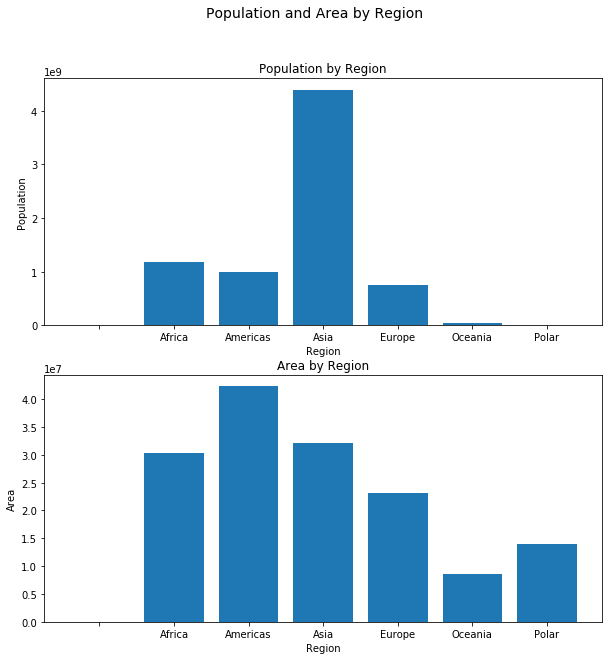

In [22]:
fig,ax = plt.subplots(2,1)
fig.suptitle('Population and Area by Region', fontsize=14)
fig.set_size_inches(10,10)
ax[0].bar(region_population['region'], region_population['population'])
ax[0].set_title("Population by Region")
ax[0].set_xlabel("Region")
ax[0].set_ylabel("Population")

ax[1].bar(region_area['region'].tolist(), region_area['area'])
ax[1].set_title("Area by Region")
ax[1].set_xlabel("Region")
ax[1].set_ylabel("Area")

#### Display a bar graph showing top 3 countries by population in each continent

In [24]:
lc = cdf.dropna().groupby('region',as_index = False)['region','name','population'].apply(lambda countries : countries.sort_values(by=['population'], ascending=False).head(3))
lc['fullname'] = lc.apply(lambda s: f"{s['name']} ({s['region']})",axis=1)   # Concatenate name and region 

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


<BarContainer object of 15 artists>

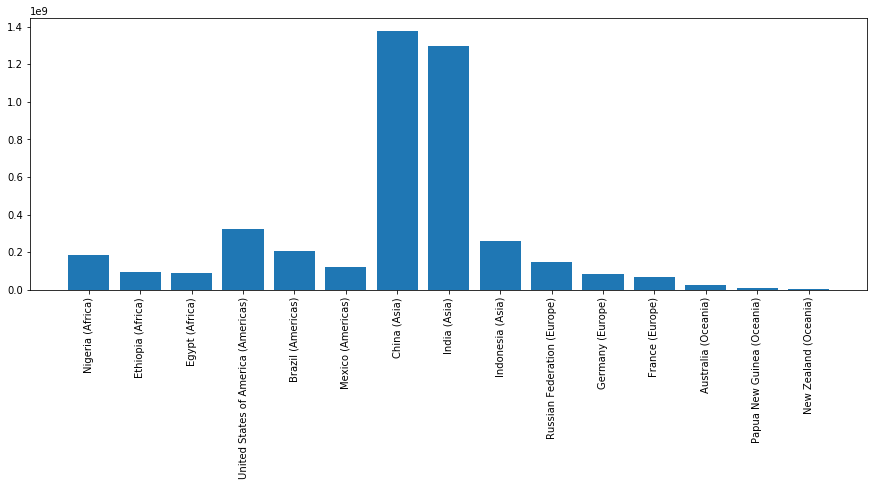

In [25]:
plt.gcf().set_size_inches(15,5)
plt.xticks(rotation = 90)
plt.bar(lc['fullname'], lc['population'])